### Plot experiments in N, f, U param space

Update U and N with values taken from PIV and water samples, respectively.

In [2]:
import cmocean as cmo
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import os
import sys
from random import seed
from random import choice

In [3]:
# Information for all runs is stored in experiment_dictionaries.py
lib_path = os.path.abspath('/ocean/kramosmu/MultipleCanyons/lab/Conduino/scripts') # Add absolute path to scripts
sys.path.append(lib_path)

import experiment_dictionaries as exdic

In [4]:
exp_dicts = [exdic.T01, exdic.T02, exdic.T03, exdic.T04, 
             exdic.T05, exdic.T06, exdic.T07, exdic.T08,
             exdic.T09, exdic.T10, exdic.T11, exdic.T12,
             exdic.T13]
exp_names = ['T01','T02','T03','T04','T05','T06','T07','T08','T09','T10','T11','T12','T13']

exp_dicts_pd = [exdic.T13b, exdic.T14, exdic.T15, exdic.T16, exdic.T17]  # pd = post defence
exp_names_pd = ['T13b','T14','T15', 'T16', 'T17']

exp_num = len(exp_dicts) # number of experiment dictionaries

Text(0.5,1,'Thesis experiments')

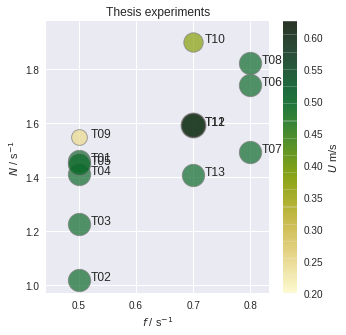

In [5]:
# Scatter plot of experiments
fig,ax = plt.subplots(1,1, figsize=(5,5))
g = 9.81
rho0 = 998.5

for exp,name in zip(exp_dicts, exp_names):
    N = np.ones(len(exp['run_files']))*np.nan
    for ii in range(len(exp['run_files'])):
        if np.isnan(exp["rho_sb"][ii])==True:
            N[ii] = ((g/rho0)*((1000*exp["rho_sb"][ii-1]-1000*exp["rho_top"][ii-1])/(exp["hsb"]*0.01)))**0.5
        else:
            N[ii] = ((g/rho0)*((1000*exp["rho_sb"][ii]-1000*exp["rho_top"][ii])/(exp["hsb"]*0.01)))**0.5
    Navg = np.nanmean(N)
    f = exp["fo"]
    U = exp["U"]

    sca = ax.scatter(f, Navg, s = 1000*U, c = U,
                     cmap = cmo.cm.speed,
                     marker = 'o',
                     edgecolors ='0.5',
                     vmax = 0.625,
                     vmin = 0.2,
                     linewidth = 1, alpha = 0.7) 
    ax.text(f+0.02, Navg, name)
cb = plt.colorbar(sca)
cb.set_label('$U$ m/s')

ax.set_ylabel('$N$ / s$^{-1}$')
ax.set_xlabel('$f$ / s$^{-1}$')
ax.set_title('Thesis experiments')

Text(0.5,1,'Post-defence experiments')

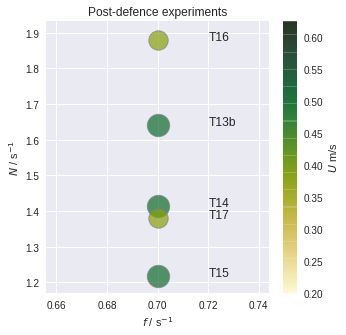

In [6]:
# Scatter plot of experiments
fig,ax = plt.subplots(1,1, figsize=(5,5))
g = 9.81
rho0 = 998.5

for exp,name in zip(exp_dicts_pd, exp_names_pd):
    N = np.ones(len(exp['run_files']))*np.nan
    for ii in range(len(exp['run_files'])):
        if np.isnan(exp["rho_sb"][ii])==True:
            N[ii] = ((g/rho0)*((1000*exp["rho_sb"][ii-1]-1000*exp["rho_top"][ii-1])/(exp["hsb"]*0.01)))**0.5
        else:
            N[ii] = ((g/rho0)*((1000*exp["rho_sb"][ii]-1000*exp["rho_top"][ii])/(exp["hsb"]*0.01)))**0.5
    Navg = np.nanmean(N)
    f = exp["fo"]
    U = exp["U"]

    sca = ax.scatter(f, Navg, s = 1000*U, c = U,
                     cmap = cmo.cm.speed,
                     marker = 'o',
                     edgecolors ='0.5',
                     vmax = 0.625,
                     vmin = 0.2,
                     linewidth = 1, alpha = 0.7) 
    ax.text(f+0.02, Navg, name)
cb = plt.colorbar(sca)
cb.set_label('$U$ m/s')

ax.set_ylabel('$N$ / s$^{-1}$')
ax.set_xlabel('$f$ / s$^{-1}$')
ax.set_title('Post-defence experiments')

Text(0.5,1,'All experiments')

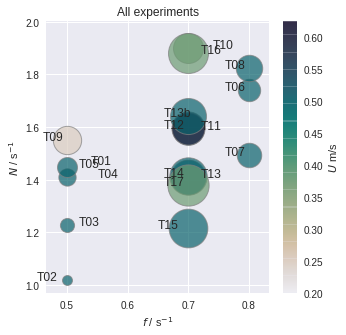

In [7]:
# Scatter plot of experiments
fig,ax = plt.subplots(1,1, figsize=(5,5))
g = 9.81
rho0 = 998.5

# Place labels in random loc near marker
# seed random number generator
seed(1)
# prepare a sequence
sequence = [0.02, 0.04,0.05,-0.04,-0.05]
    
for exp,name,jj in zip(exp_dicts+exp_dicts_pd, exp_names+exp_names_pd, range(len(exp_names+exp_names_pd))):
    N = np.ones(len(exp['run_files']))*np.nan
    for ii in range(len(exp['run_files'])):
        if np.isnan(exp["rho_sb"][ii])==True:
            N[ii] = ((g/rho0)*((1000*exp["rho_sb"][ii-1]-1000*exp["rho_top"][ii-1])/(exp["hsb"]*0.01)))**0.5
        else:
            N[ii] = ((g/rho0)*((1000*exp["rho_sb"][ii]-1000*exp["rho_top"][ii])/(exp["hsb"]*0.01)))**0.5
    Navg = np.nanmean(N)
    f = exp["fo"]
    U = exp["U"]
    sca = ax.scatter(f, Navg, s = 100*jj, c = U,
                     cmap = cmo.cm.rain,
                     marker = 'o',
                     edgecolors ='0.5',
                     vmax = 0.625,
                     vmin = 0.2,
                     linewidth = 1, alpha = 0.7) 
    
    # make choices from the sequence
    offset = choice(sequence)
    ax.text(f+offset, Navg, name)
cb = plt.colorbar(sca)
cb.set_label('$U$ m/s')

ax.set_ylabel('$N$ / s$^{-1}$')
ax.set_xlabel('$f$ / s$^{-1}$')
ax.set_title('All experiments')